**DATA ANALYSIS**

***TASK 5***

**EMPLOY SALARIES FOR DIFFERENT JOB ROLES**

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Dataset:-"ds_salaries.csv"

In [2]:
df = pd.read_csv("ds_salaries.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Descriptive Statistics

In [3]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Categorical variables

In [4]:
categorical=[var for var in df.columns if df[var].dtype==object]
print("Categorical variables are,\n",categorical)

Categorical variables are,
 ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


Numerical variables

In [5]:
numerical=[var for var in df.columns if df[var].dtype!='object']
print("Numerical variables are\n",numerical)

Numerical variables are
 ['Unnamed: 0', 'work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [6]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df['work_year']=df['work_year'].astype(int)
df['salary'] = df['salary'].astype(int)
df['salary_in_usd'] = df['salary_in_usd'].astype(float)
df['remote_ratio'] = df['remote_ratio'].astype(int)

In [9]:
# Summary statistics
print("Summary statistics is")
print(df.describe())

Summary statistics is
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000


VISUALIZATIONS

 Salary distribution

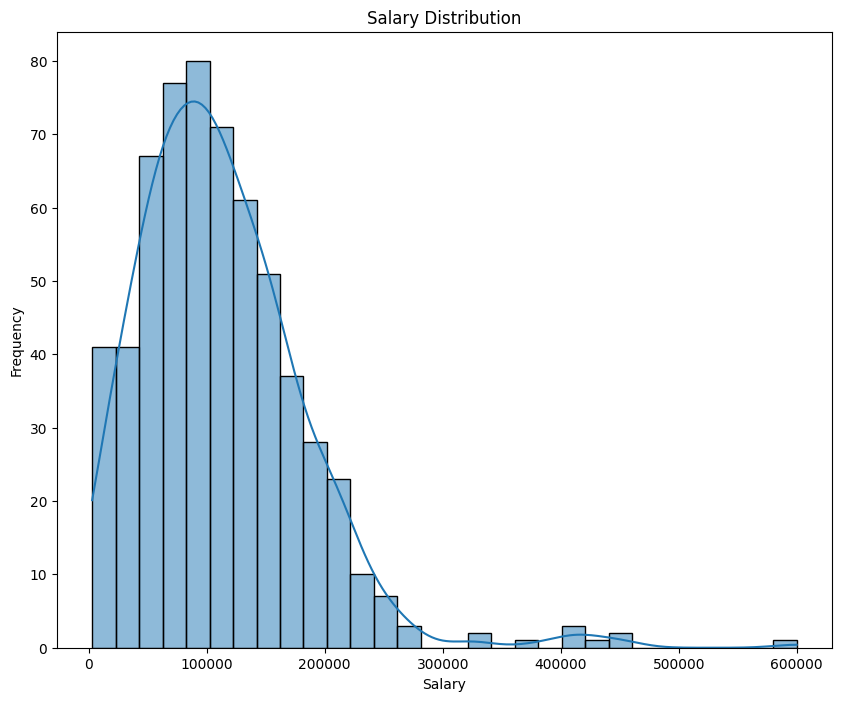

In [10]:
plt.figure(figsize=(10, 8))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


Salary is distributed highly around $100000.

 Average salary by job title


Highest Average Salary by Job Title:
 job_title
Data Analytics Lead    405000.0
Name: salary_in_usd, dtype: float64

Lowest Average Salary by Job Title:
 job_title
3D Computer Vision Researcher    5409.0
Name: salary_in_usd, dtype: float64


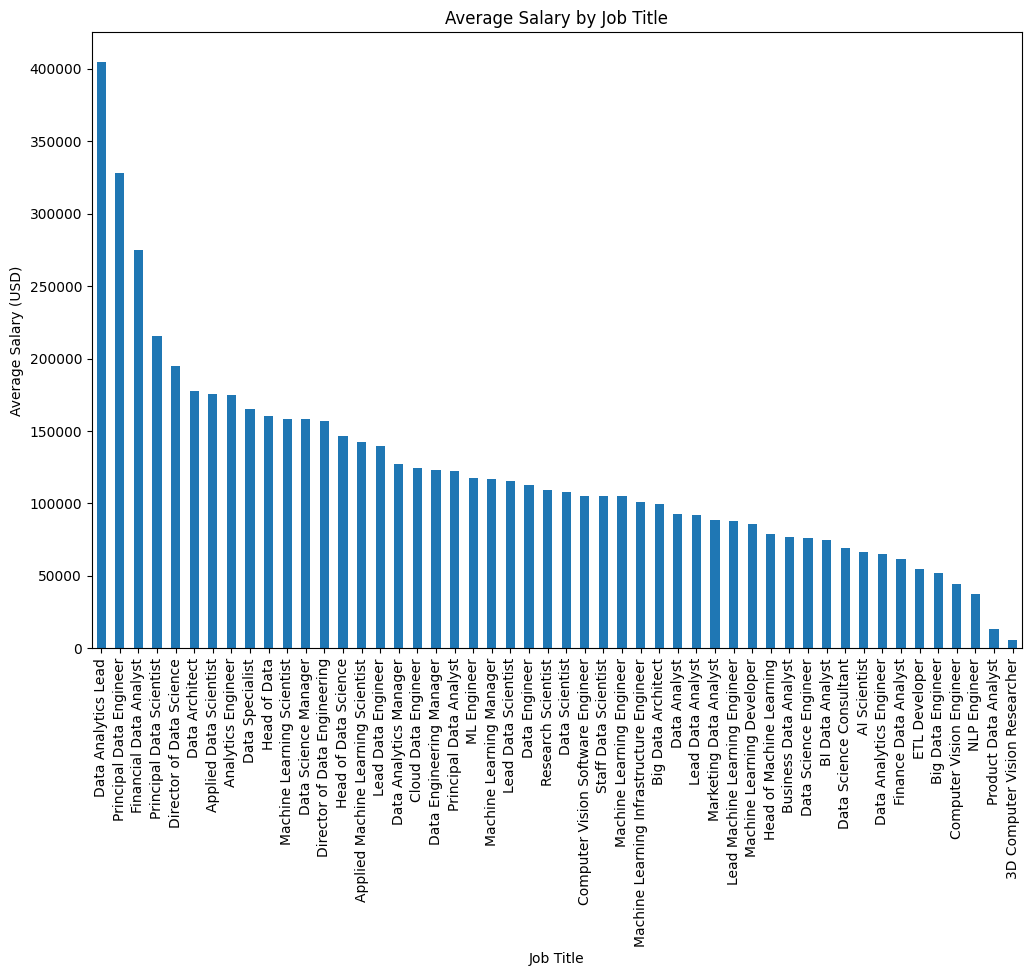

In [12]:
avg_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nHighest Average Salary by Job Title:\n", avg_salary_by_job.head(1))
print("\nLowest Average Salary by Job Title:\n",avg_salary_by_job.tail(1))

# bar plot
plt.figure(figsize=(12, 8))
avg_salary_by_job.plot(kind='bar')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.show()



 Average salary by company location


Highest Average Salary by Company Location:
 company_location
RU    157500.0
Name: salary_in_usd, dtype: float64

Lowest Average Salary by Company Location:
 company_location
VN    4000.0
Name: salary_in_usd, dtype: float64


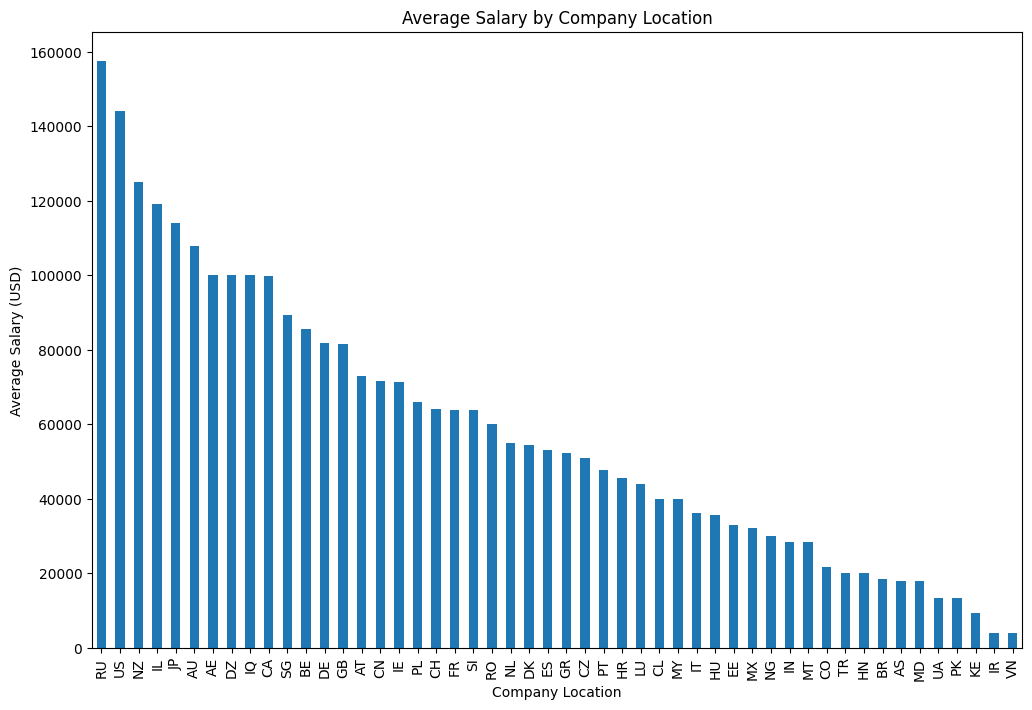

In [13]:
avg_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nHighest Average Salary by Company Location:\n", avg_salary_by_location.head(1))
print("\nLowest Average Salary by Company Location:\n", avg_salary_by_location.tail(1))

# bar plot
plt.figure(figsize=(12, 8))
avg_salary_by_location.plot(kind='bar')
plt.title('Average Salary by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.show()


 Average salary by company size


Average Salary by Company Size:
 company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64


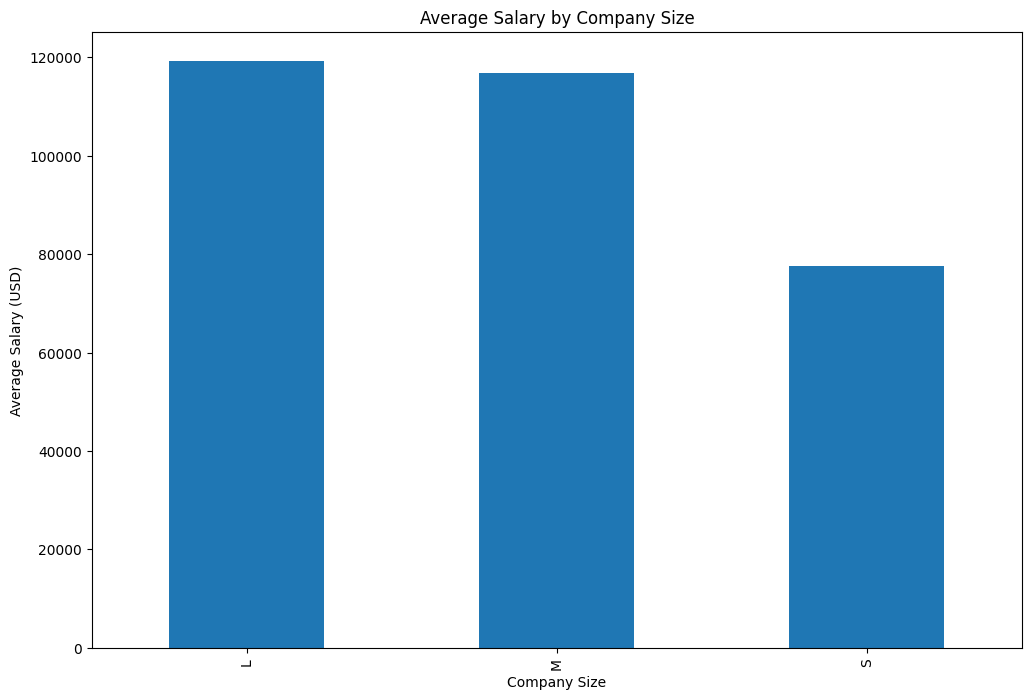

In [14]:
avg_salary_by_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nAverage Salary by Company Size:\n", avg_salary_by_size)

# bar plot
plt.figure(figsize=(12, 8))
avg_salary_by_size.plot(kind='bar')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.show()


 Experience level vs salary


Average Salary by Experience Level:
 experience_level
EX    199392.038462
SE    138617.292857
MI     87996.056338
EN     61643.318182
Name: salary_in_usd, dtype: float64


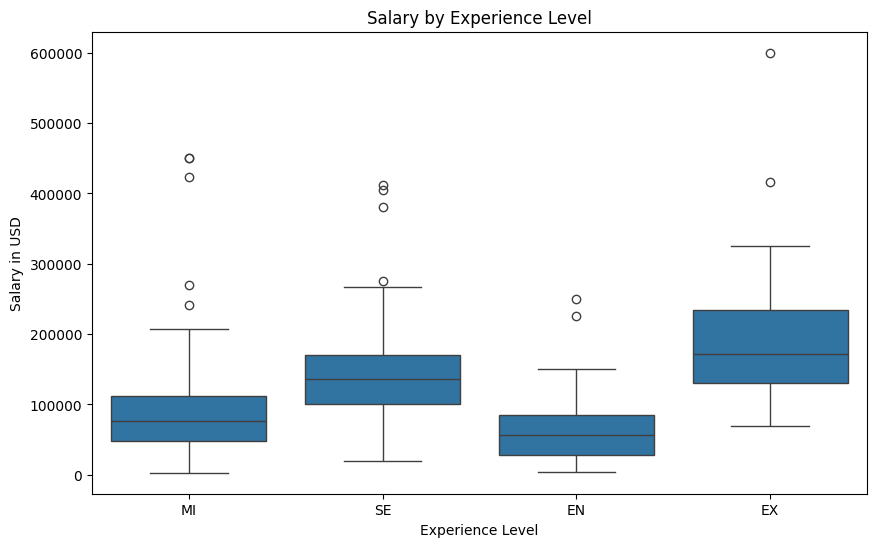

In [15]:
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nAverage Salary by Experience Level:\n", avg_salary_by_experience)

# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

 Remote ratio vs salary


Average Salary by Remote Ratio:
 remote_ratio
100    122457.454068
0      106354.622047
50      80823.030303
Name: salary_in_usd, dtype: float64


<ipython-input-16-e2569e027148>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_remote.index, y=avg_salary_by_remote.values, palette='viridis')


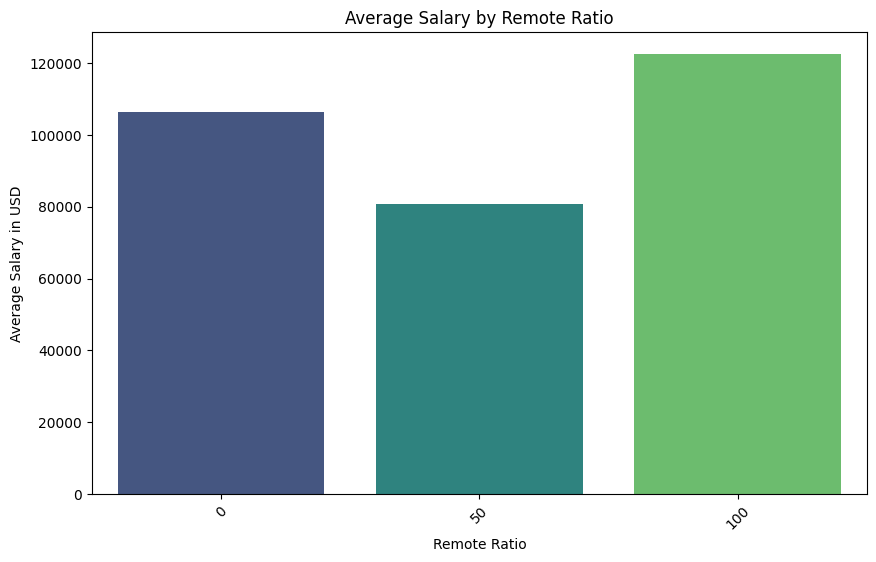

In [16]:
# Average salary by remote ratio
avg_salary_by_remote = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nAverage Salary by Remote Ratio:\n", avg_salary_by_remote)

# Average salary by remote ratio
avg_salary_by_remote = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_remote.index, y=avg_salary_by_remote.values, palette='viridis')
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.show()


**CONCLUSIONS**

*  The distribution of salaries shows a right-skewed pattern, indicating that while most employees earn lower to mid-range salaries, there are a smaller number of employees with significantly higher salaries.    
*  Data Analyst Lead is the highest paid job role whereas 3D Computer Vision Researcher is the lowest paid job role.It could be possibly indicating less specialization or fewer responsibilities.
*   Companies in Russia provides highest average salary while companies in Vietnam pays the lowest average salary.The difference will be due to the economic conditions and cost of living.
*   Large companies have the higher salary packages.Medium sized companies provides much more than small sized companies but less than large sized companies.This could be due to larger companies having more resources and offering better compensation packages.
*   Higher experience levels (EX) are associated with higher salaries, which is consistent with the expectation that more experienced employees command greater compensation. Entry-level(EL) positions show a broader range of salaries, which might reflect varying initial compensation packages.
*   The average salary appears to vary with the remote work ratio. Employees with a higher remote work ratio tend to earn different salaries compared to those working on-site. This variation could be influenced by company policies or regional compensation differences related to remote work.
















